In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
path = "C:\Users\amu277\Documents\df_results.csv"

df = pd.read_csv(path,delimiter=';', parse_dates= [0])
df = df[[u'DATE','WEEK_END','TPER_TEAM','TPER_HOUR','ASS_ASSIGNMENT','ASS_POLE','SPLIT_COD','CSPL_RECEIVED_CALLS']]
df= df.groupby(['DATE','WEEK_END','TPER_TEAM','TPER_HOUR','ASS_ASSIGNMENT','ASS_POLE'], as_index=False).agg({'CSPL_RECEIVED_CALLS' : np.sum})

In [14]:
df= df.set_index(['DATE'])


In [15]:
df.head()

,WEEK_END,TPER_TEAM,TPER_HOUR,ASS_ASSIGNMENT,ASS_POLE,CSPL_RECEIVED_CALLS
DATE,,,,,,
2011-01-01,1,Nuit,0,Crises,CRISES,0
2011-01-01,1,Nuit,0,Domicile,SANTE,0
2011-01-01,1,Nuit,0,Gestion,ADMINISTRATIF,0
2011-01-01,1,Nuit,0,Gestion - Accueil Telephonique,ADMINISTRATIF,0
2011-01-01,1,Nuit,0,Gestion Amex,ADMINISTRATIF,0


In [47]:

import numpy as np
df['TPER_TEAM']= pd.Categorical(df.TPER_TEAM).codes
df['ASS_POLE'] = pd.Categorical(df.ASS_POLE).codes
df['ASSIGNMENT_CODE']= pd.Categorical(df.ASS_ASSIGNMENT).codes


In [77]:
ASS_ASSIGNMENT= {'CAT':0,'CMS':1 ,'Domicile':3,'Gestion':5,'Gestion - Accueil Telephonique':6,'Gestion Amex':7,'Gestion Assurances':8,
                'Gestion Clients':9,'Gestion DZ':10,'Gestion Relation Clienteles':11,'Gestion Renault':12,'Japon':13,'Manager':14,'Mécanicien':15,'Médical':16,'Nuit':17,
                 'Prestataires':18,'RENAULT':19,
                'RTC':20,'Regulation Medicale':21,'SAP':22,'Services':23,'Tech. Axa':24,'Tech. Inter':25,'Tech. Total':26,'Téléphonie':27,'Crises':2}

In [57]:
df_RTC = df[df['ASS_ASSIGNMENT']== 'RTC']
df_TELE = df[df['ASS_ASSIGNMENT']=='Téléphonie']
df_RENAULT = df[df['ASS_ASSIGNMENT']== 'RENAULT']
df_GAT = df[df['ASS_ASSIGNMENT']=='Gestion - Accueil Telephonique']
df_TT = df[df['ASS_ASSIGNMENT']== 'Tech. Total']
df_GA = df[df['ASS_ASSIGNMENT']== 'Gestion Amex']
df_T = df[df['ASS_ASSIGNMENT']== 'Tech.Inter']
df_S  = df[df['ASS_ASSIGNMENT']== 'Services']
df_D = df[df['ASS_ASSIGNMENT']== 'Domicile']
df_GR = df[df['ASS_ASSIGNMENT']== 'Gestion Renault']
df_GRC = df[df['ASS_ASSIGNMENT']== 'Gestion Relation Clienteles']
df_M   = df[df['ASS_ASSIGNMENT']== 'Manager']
df_N =  df[df['ASS_ASSIGNMENT']=='Nuit']
df_RM = df[df['ASS_ASSIGNMENT']=='Regulation Medicale']
df_C = df[df['ASS_ASSIGNMENT']=='Crises']
df_J = df[df['ASS_ASSIGNMENT']=='Japon']
df_ME = df[df['ASS_ASSIGNMENT']=='Médical']
df_GAS = df[df['ASS_ASSIGNMENT']=='Gestion Assurances']
df_G = df[df['ASS_ASSIGNMENT']=='Gestion']
df_SAP= df[df['ASS_ASSIGNMENT']=='SAP']
df_GC = df[df['ASS_ASSIGNMENT']=='Gestion Clients']
df_TA = df[df['ASS_ASSIGNMENT']=='Tech. Axa']
df_CAT = df[df['ASS_ASSIGNMENT']=='CAT']
df_GDZ = df[df['ASS_ASSIGNMENT']=='Gestion DZ']
df_MECH = df[df['ASS_ASSIGNMENT']=='Mécanicien']
df_CMS = df[df['ASS_ASSIGNMENT']=='CMS']
df_P = df[df['ASS_ASSIGNMENT']=='Prestataires']
df_E = df[df['ASS_ASSIGNMENT']=='Evenements']
#df_D = df_D.to_period( freq= '30 min')

df_D.tail()


                     WEEK_END  TPER_TEAM  TPER_HOUR  \
DATE                                                  
2011-01-03 07:00:00         0          1          7   
2011-01-03 07:30:00         0          0          7   

                                  ASS_ASSIGNMENT  ASS_POLE  \
DATE                                                         
2011-01-03 07:00:00  Gestion Relation Clienteles         0   
2011-01-03 07:30:00  Gestion Relation Clienteles         0   

                     CSPL_RECEIVED_CALLS  ASSIGNMENT_CODE  
DATE                                                       
2011-01-03 07:00:00                    0               11  
2011-01-03 07:30:00                    0               11  


In [76]:
df[df['ASS_ASSIGNMENT']=='Prestataires'][:2]

,WEEK_END,TPER_TEAM,TPER_HOUR,ASS_ASSIGNMENT,ASS_POLE,CSPL_RECEIVED_CALLS,ASSIGNMENT_CODE
DATE,,,,,,,
2011-01-03 09:00:00,0,0,9,Prestataires,0,0,18
2011-01-03 09:30:00,0,0,9,Prestataires,0,0,18


In [18]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

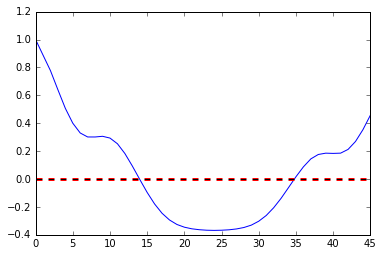

In [19]:

df_D_acf = acf(df_D.CSPL_RECEIVED_CALLS.values, nlags = 45)
plt.plot(df_D_acf)
plt.axhline(y=0,linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(df_D.CSPL_RECEIVED_CALLS.values)),linestyle='--', color = 'red')
plt.axhline(y=1.96/np.sqrt(len(df_D.CSPL_RECEIVED_CALLS.values)),linestyle='--', color = 'red')

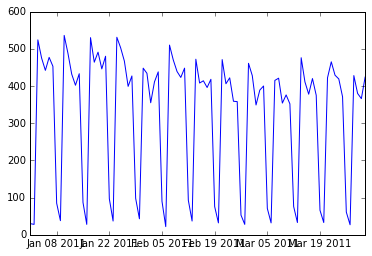

In [20]:
df_new =pd.DataFrame( df_D['CSPL_RECEIVED_CALLS'].resample('1D').sum())

#df_new.resample('1W').mean().plot()
m= df_new.resample('1D').sum()
plt.plot(df_new[:90])



In [21]:
Y = df_D['CSPL_RECEIVED_CALLS']
df_new.tail()

,CSPL_RECEIVED_CALLS
DATE,
2013-12-27,NaN
2013-12-28,NaN
2013-12-29,27.0
2013-12-30,395.0
2013-12-31,267.0


In [22]:
Y = df_new['CSPL_RECEIVED_CALLS']
mod = sm.tsa.SARIMAX(Y, trend='n', order=(1,0,1), seasonal_order=(0,1,0,12))
results = mod.fit()
print results.summary()

                                 Statespace Model Results                                 
Dep. Variable:                CSPL_RECEIVED_CALLS   No. Observations:                 1096
Model:             SARIMAX(1, 0, 1)x(0, 1, 0, 12)   Log Likelihood               -6945.828
Date:                            Thu, 12 Jan 2017   AIC                          13897.655
Time:                                    14:24:13   BIC                          13912.654
Sample:                                01-01-2011   HQIC                         13903.330
                                     - 12-31-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3752      0.042     -8.846      0.000      -0.458      -0.292
ma.L1          0.9293      0.014   

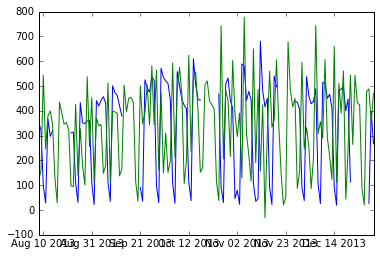

In [23]:
#plt.plot(Y)
#plt.plot(results.fittedvalues[:60],color='red')
#X = pd.DataFrame([df_D['CSPL_RECEIVED_CALLS'],results.fittedvalues]) 
df_results= pd.DataFrame(results.fittedvalues, columns=['pred_val'])
df_res=df_results.reset_index()

plt.plot(df_new[950:])
#print len(df_new)
plt.plot(df_results[950:])


"\ndf_D['forecast']= results.predict(250, 750, dynamic= True)\nplt.plot(df_D['forecast'], color='blue')\nplt.plot(df_D.CSPL_RECEIVED_CALLS[250:750], color='yellow')\n"

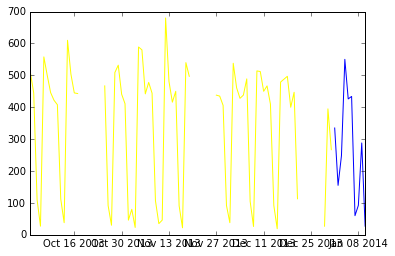

In [24]:
#predict_ci = predict.conf_int()
#plt.plot(df_D.CSPL_RECEIVED_CALLS)
#plt.plot(results.forecast(100))

# Plot predictions
predict = results.get_prediction()
#predict.predicted_mean.plot(color='red')
plt.plot(df_new[1006:1096], color= 'yellow')
plt.plot(results.forecast(10))

"""
df_D['forecast']= results.predict(250, 750, dynamic= True)
plt.plot(df_D['forecast'], color='blue')
plt.plot(df_D.CSPL_RECEIVED_CALLS[250:750], color='yellow')
"""

In [57]:
#print df_D.head(), df_results.head()
df_D.index

PeriodIndex(['2011-01-01 00:00', '2011-01-01 00:30', '2011-01-01 01:00',
             '2011-01-01 01:30', '2011-01-01 02:00', '2011-01-01 02:30',
             '2011-01-01 03:00', '2011-01-01 03:30', '2011-01-01 04:00',
             '2011-01-01 04:30',
             ...
             '2013-12-31 19:00', '2013-12-31 19:30', '2013-12-31 20:00',
             '2013-12-31 20:30', '2013-12-31 21:00', '2013-12-31 21:30',
             '2013-12-31 22:00', '2013-12-31 22:30', '2013-12-31 23:00',
             '2013-12-31 23:30'],
            dtype='int64', name=u'DATE', length=48478, freq='30T')

In [25]:
df_1=df_D.reset_index()
df_1['DAY']=df_1['DATE'].apply(lambda x: x.date())
df_1= df_1.rename(columns={'DATE':'DATE_TIME','DAY':'DATE'})

#df_1.head()
df_res.head()

,DATE,pred_val
0,2011-01-01,0.000000
1,2011-01-02,0.692166
2,2011-01-03,0.376146
3,2011-01-04,12.068735
4,2011-01-05,6.268968


In [26]:
#df_combined= pd.merge(df_1,df_res, on='DATE',how='inner')
#df_combined.head()
#df_combined.head()
#df_combined= df_res.join(df_1,on='DATE',how='right',rsuffix='_R')
#df_res['DATE']= df_res['DATE'].apply(lambda x: x.to_datetime())
df_res['DATE']= df_res['DATE'].astype(str)
#df_res['DATE']=pd.to_datetime(df_res['DATE'])



In [27]:
df_res['DATE']= pd.to_datetime(df_res['DATE'], format='%Y/%m/%d')

In [28]:
df_res['DATE']= df_res['DATE'].astype(str)
df_1['DATE']= df_1['DATE'].astype(str)


In [29]:
#df_res['DATE']=df_res['DATE'].apply(lambda x: x.date())
print type(df_res.DATE[1]), type(df_1.DATE[1])

<type 'str'> <type 'str'>


In [30]:
df_combined= pd.merge(df_1,df_res,on='DATE',how='left')
df_combined.head()

,DATE_TIME,WEEK_END,TPER_TEAM,TPER_HOUR,ASS_ASSIGNMENT,ASS_POLE,CSPL_RECEIVED_CALLS,ASSIGNMENT_CODE,DATE,pred_val
0,2011-01-01 00:00:00,1,1,0,Domicile,8,0,3,2011-01-01,0.0
1,2011-01-01 00:30:00,1,1,0,Domicile,8,0,3,2011-01-01,0.0
2,2011-01-01 01:00:00,1,1,1,Domicile,8,0,3,2011-01-01,0.0
3,2011-01-01 01:30:00,1,1,1,Domicile,8,0,3,2011-01-01,0.0
4,2011-01-01 02:00:00,1,1,2,Domicile,8,0,3,2011-01-01,0.0


In [31]:
df_combined.drop(['ASS_POLE'], axis=1, inplace=True)

In [32]:
df_combined.head()

,DATE_TIME,WEEK_END,TPER_TEAM,TPER_HOUR,ASS_ASSIGNMENT,CSPL_RECEIVED_CALLS,ASSIGNMENT_CODE,DATE,pred_val
0,2011-01-01 00:00:00,1,1,0,Domicile,0,3,2011-01-01,0.0
1,2011-01-01 00:30:00,1,1,0,Domicile,0,3,2011-01-01,0.0
2,2011-01-01 01:00:00,1,1,1,Domicile,0,3,2011-01-01,0.0
3,2011-01-01 01:30:00,1,1,1,Domicile,0,3,2011-01-01,0.0
4,2011-01-01 02:00:00,1,1,2,Domicile,0,3,2011-01-01,0.0


### KNN

In [33]:
from sklearn.neighbors import KNeighborsRegressor
X = df_combined[['WEEK_END','TPER_TEAM','TPER_HOUR','ASSIGNMENT_CODE','pred_val']]
y = df_combined[['CSPL_RECEIVED_CALLS']]

In [34]:
nbrs = KNeighborsRegressor(n_neighbors= 5, weights='distance')
nbrs.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [35]:
round(nbrs.predict([0,0,21,3,469]),0) 

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


1.0

In [36]:
df_submit = pd.read_csv("D:\Masters_DataSci\Courses\Methods_BD\AXA Challenge\submission.csv", delimiter='\t',names=['DATE','ASS_ASSIGMNENT','prediction'],)

In [37]:
df_submit.head()

,DATE,ASS_ASSIGMNENT,prediction
0,DATE,ASS_ASSIGNMENT,prediction
1,2012-12-28 00:00:00.000,CMS,0
2,2012-12-28 00:00:00.000,Crises,0
3,2012-12-28 00:00:00.000,Domicile,0
4,2012-12-28 00:00:00.000,Gestion,0


In [543]:
#df_submit = df_submit.drop(df_submit.index[[0]])

In [38]:
df_submit.head()
type(df_submit['DATE'][1])

str

In [78]:
X_submit = pd.read_csv("D:\Masters_DataSci\Courses\Methods_BD\AXA Challenge\submission_1.csv")
X_submit['ASSIGNMENT_CODE']= X_submit['ASS_ASSIGNMENT'].apply(lambda x: ASS_ASSIGNMENT[x])
X_submit.head()

,DATE,DATE_1,HOUR,TPER_HOUR,MIN,TPER_TEAM,WEEK_END,ASS_ASSIGNMENT,prediction,ASSIGNMENT_CODE
0,2012-12-28 00:00:00.000,12/28/2012,00:00.0,0,0,1,0,CMS,0,1
1,2012-12-28 00:00:00.000,12/28/2012,00:00.0,0,0,1,0,Crises,0,2
2,2012-12-28 00:00:00.000,12/28/2012,00:00.0,0,0,1,0,Domicile,0,3
3,2012-12-28 00:00:00.000,12/28/2012,00:00.0,0,0,1,0,Gestion,0,5
4,2012-12-28 00:00:00.000,12/28/2012,00:00.0,0,0,1,0,Gestion - Accueil Telephonique,0,6


In [79]:
X_submit.drop(['DATE_1','HOUR','MIN','prediction'],1,inplace=True)

print df_results.loc['2012-12-28']
X_submit.head()

pred_val    69.4512
Name: 2012-12-28 00:00:00, dtype: float64


,DATE,TPER_HOUR,TPER_TEAM,WEEK_END,ASS_ASSIGNMENT,ASSIGNMENT_CODE
0,2012-12-28 00:00:00.000,0,1,0,CMS,1
1,2012-12-28 00:00:00.000,0,1,0,Crises,2
2,2012-12-28 00:00:00.000,0,1,0,Domicile,3
3,2012-12-28 00:00:00.000,0,1,0,Gestion,5
4,2012-12-28 00:00:00.000,0,1,0,Gestion - Accueil Telephonique,6


In [83]:
X_submit['DATE_ONLY']= pd.to_datetime(X_submit['DATE'], format='%Y/%m/%d')
X_submit['DATE_ONLY']= X_submit['DATE_ONLY'].astype(str)
for _ in X_submit:
    if (df_results['DATE'].loc[X_submit['DATE]):
        X_submit['pred_val']= X_submit['DATE_ONLY'].apply(lambda x: df_results.loc[x])[X_submit['ASS_ASSIGNMENT']=='Domicile']
#X = X_submit[['WEEK_END','TPER_TEAM','TPER_HOUR','pred_val']]
#y = df_combined['CSPL_RECEIVED_CALLS']


KeyError: 'DATE'

In [489]:
df_results.loc[X_submit['DATE_ONLY'][1]]


pred_val    69.4512
Name: 2012-12-28, dtype: float64

In [498]:
X = X_submit[['WEEK_END','TPER_TEAM','TPER_HOUR','pred_val']]
#nbrs.predict([X_submit.WEEK_END[1:10],X_submit.TPER_TEAM[1],X_submit.TPER_HOUR[1],X_submit.pred_val[1]])


In [501]:
X= np.array(X)

In [518]:
Y= nbrs.predict(X)
Y = [round(n,0) for n in Y]
Y = pd.DataFrame(Y)
Y.to_csv('D:\Masters_DataSci\Courses\Methods_BD\AXA Challenge\submission_4.csv')

In [506]:
df_submission['prediction']= df_submission['prediction'].apply(lambda x: x= round(nbrs.predict(X[:5]),0)

TypeError: only length-1 arrays can be converted to Python scalars